<a href="https://colab.research.google.com/github/Murad460/Data_Science_Projects/blob/main/clinical_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df=pd.read_json("/content/clinical.project-fm-ad.2024-12-03.json")
df

,case_id,project,submitter_id,diagnoses,demographic
0,00016c8f-a0be-4319-9c42-4f3bcd90ac92,{'project_id': 'FM-AD'},AD1602,"[{'morphology': '8010/3', 'submitter_id': 'AD1...",{'demographic_id': '4d0c7e80-79f9-43b2-aecc-96...
1,00048fa6-4318-42ef-9709-7dedb0d938b3,{'project_id': 'FM-AD'},AD2413,"[{'morphology': '8140/3', 'submitter_id': 'AD2...",{'demographic_id': 'ecd2d164-c2ed-4e15-80d8-6a...
2,00061f34-c891-4f9c-b8d6-3ca68b98c875,{'project_id': 'FM-AD'},AD1348,"[{'morphology': '8500/3', 'submitter_id': 'AD1...",{'demographic_id': '29bb15bf-70f9-495d-90d7-8a...
3,000aa4f6-473f-4cc1-9392-ab8872019fe7,{'project_id': 'FM-AD'},AD15019,"[{'morphology': '8140/3', 'submitter_id': 'AD1...",{'demographic_id': 'e795c87e-e1e6-4222-854b-39...
4,000da8b9-7511-4097-ae68-2c0f0cfe6f85,{'project_id': 'FM-AD'},AD11350,"[{'morphology': '8140/3', 'submitter_id': 'AD1...",{'demographic_id': 'a327f173-b75d-4009-9251-4e...
...,...,...,...,...,...
17999,ffeb29ce-a043-4023-9e87-d46fdd2c615e,{'project_id': 'FM-AD'},AD2819,"[{'morphology': '8140/3', 'submitter_id': 'AD2...",{'demographic_id': '2cbfd8fe-5392-4c23-95f2-24...
18000,ffed355f-1073-4d8f-a49b-481b85d759fe,{'project_id': 'FM-AD'},AD6364,"[{'morphology': '9050/3', 'submitter_id': 'AD6...",{'demographic_id': 'e2d7a575-e272-4c6d-8dac-f7...
18001,fff44d51-a08f-4dac-98d8-d1b066544af8,{'project_id': 'FM-AD'},AD6563,"[{'morphology': '8070/3', 'submitter_id': 'AD6...",{'demographic_id': 'c5878b9c-bb47-47cb-950b-88...
18002,fff4b617-ec7e-4e6e-9554-38f181372573,{'project_id': 'FM-AD'},AD4862,"[{'morphology': '8140/3', 'submitter_id': 'AD4...",{'demographic_id': '0884bc47-7aae-46cf-854e-d3...


In [3]:
def extract_dict(data):
    if isinstance(data, list) :
        return data[0]  # Assuming the list contains a single dictionary per rows
    return {}

df_flattened = df['diagnoses'].apply(extract_dict).apply(pd.Series)


In [4]:
df_flattened

,morphology,submitter_id,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,primary_diagnosis,classification_of_tumor,updated_datetime,diagnosis_id,site_of_resection_or_biopsy,state,tumor_grade,progression_or_recurrence
0,8010/3,AD1602_diagnosis,2017-06-16T16:16:40.389504-05:00,not reported,"Breast, NOS",14656,"Carcinoma, NOS",metastasis,2019-07-10T13:30:36.696487-05:00,ad2e155a-3045-4b21-b0d0-ff354f228248,"Thorax, NOS",released,Not Reported,not reported
1,8140/3,AD2413_diagnosis,2017-06-16T15:40:26.017978-05:00,not reported,"Lung, NOS",20375,"Adenocarcinoma, NOS",primary,2019-07-10T13:09:45.999834-05:00,458f9e5b-2311-45c7-8db8-3c3d4935830d,"Lung, NOS",released,Not Reported,not reported
2,8500/3,AD1348_diagnosis,2017-06-16T16:12:48.146318-05:00,not reported,"Pancreas, NOS",23207,"Duct adenocarcinoma, NOS",metastasis,2019-07-10T13:49:54.042234-05:00,fad01a8b-bfb3-4e50-99ae-c5eba83c97ac,"Abdomen, NOS",released,Not Reported,not reported
3,8140/3,AD15019_diagnosis,2017-06-16T16:15:46.282357-05:00,not reported,"Stomach, NOS",17068,"Adenocarcinoma, NOS",primary,2019-07-10T13:31:45.189881-05:00,b0a1413a-6118-4301-8436-68f9a673f33a,"Stomach, NOS",released,Not Reported,not reported
4,8140/3,AD11350_diagnosis,2017-06-16T15:50:50.640983-05:00,not reported,"Lung, NOS",27655,"Adenocarcinoma, NOS",primary,2019-07-10T13:27:57.637280-05:00,8fd8c273-2930-4a79-b30b-2eb4f682bbb5,"Lung, NOS",released,Not Reported,not reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17999,8140/3,AD2819_diagnosis,2017-06-16T15:43:06.585011-05:00,not reported,"Small intestine, NOS",14846,"Adenocarcinoma, NOS",metastasis,2019-07-10T13:21:36.149226-05:00,746342b5-456c-4476-883e-dcf4642d475a,Ovary,released,Not Reported,not reported
18000,9050/3,AD6364_diagnosis,2017-06-19T09:07:37.516049-05:00,not reported,"Pleura, NOS",27428,"Mesothelioma, NOS",metastasis,2019-07-10T13:45:16.307760-05:00,eb498d26-09b7-456c-9e15-eaa050ea9283,"Lung, NOS",released,Not Reported,not reported
18001,8070/3,AD6563_diagnosis,2017-06-19T09:06:50.876331-05:00,not reported,"Lung, NOS",26346,"Squamous cell carcinoma, NOS",primary,2019-07-10T13:08:02.230450-05:00,3f400091-4f52-4f52-ac1f-ebb001be4cdb,"Lung, NOS",released,Not Reported,not reported
18002,8140/3,AD4862_diagnosis,2017-06-16T16:04:48.159357-05:00,not reported,"Lung, NOS",19309,"Adenocarcinoma, NOS",primary,2019-07-10T12:41:28.703675-05:00,9564ad14-729e-4606-b992-8954fb7f23b7,"Lung, NOS",released,Not Reported,not reported


In [5]:
df_pro=df["project"].apply(pd.Series)
df_pro

,project_id
0,FM-AD
1,FM-AD
2,FM-AD
3,FM-AD
4,FM-AD
...,...
17999,FM-AD
18000,FM-AD
18001,FM-AD
18002,FM-AD


In [6]:
dgh=df["demographic"].apply(pd.Series)
dgh

,demographic_id,ethnicity,gender,race,vital_status,updated_datetime,submitter_id,state,created_datetime
0,4d0c7e80-79f9-43b2-aecc-9627c4df2138,not reported,female,not reported,Not Reported,2019-04-26T16:46:11.690380-05:00,AD1602_demographic,released,2017-06-19T11:42:44.248885-05:00
1,ecd2d164-c2ed-4e15-80d8-6acfc7783817,not reported,male,not reported,Not Reported,2019-04-26T17:02:29.952922-05:00,AD2413_demographic,released,2017-06-19T11:22:31.973513-05:00
2,29bb15bf-70f9-495d-90d7-8a5e64216993,not reported,female,not reported,Not Reported,2019-04-26T16:11:11.454039-05:00,AD1348_demographic,released,2017-06-19T11:39:17.758259-05:00
3,e795c87e-e1e6-4222-854b-391f60b4fb54,not reported,female,not reported,Not Reported,2019-04-26T17:24:12.227263-05:00,AD15019_demographic,released,2017-06-19T11:42:21.615471-05:00
4,a327f173-b75d-4009-9251-4ec9ce81e907,not reported,female,not reported,Not Reported,2019-04-26T16:38:01.649649-05:00,AD11350_demographic,released,2017-06-19T11:28:13.114878-05:00
...,...,...,...,...,...,...,...,...,...
17999,2cbfd8fe-5392-4c23-95f2-2451ddf2a617,not reported,female,not reported,Not Reported,2019-04-26T17:24:43.001603-05:00,AD2819_demographic,released,2017-06-19T11:23:57.648646-05:00
18000,e2d7a575-e272-4c6d-8dac-f7c6772f4b84,not reported,male,not reported,Not Reported,2019-04-26T16:36:19.239101-05:00,AD6364_demographic,released,2017-06-19T11:39:24.727884-05:00
18001,c5878b9c-bb47-47cb-950b-88c936d916b6,not reported,male,not reported,Not Reported,2019-04-26T17:07:06.741211-05:00,AD6563_demographic,released,2017-06-19T11:39:07.528224-05:00
18002,0884bc47-7aae-46cf-854e-d338282c2acd,not reported,female,not reported,Not Reported,2019-04-26T17:05:01.980372-05:00,AD4862_demographic,released,2017-06-19T11:33:30.012248-05:00


In [7]:
concaty=pd.concat([df,df_flattened,df_pro,dgh],axis=1).drop(columns=["case_id","submitter_id","submitter_id","diagnosis_id","created_datetime","demographic_id","project","updated_datetime","diagnoses","demographic","created_datetime"])
concaty

,morphology,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,primary_diagnosis,classification_of_tumor,site_of_resection_or_biopsy,state,tumor_grade,progression_or_recurrence,project_id,ethnicity,gender,race,vital_status,state
0,8010/3,not reported,"Breast, NOS",14656,"Carcinoma, NOS",metastasis,"Thorax, NOS",released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released
1,8140/3,not reported,"Lung, NOS",20375,"Adenocarcinoma, NOS",primary,"Lung, NOS",released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released
2,8500/3,not reported,"Pancreas, NOS",23207,"Duct adenocarcinoma, NOS",metastasis,"Abdomen, NOS",released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released
3,8140/3,not reported,"Stomach, NOS",17068,"Adenocarcinoma, NOS",primary,"Stomach, NOS",released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released
4,8140/3,not reported,"Lung, NOS",27655,"Adenocarcinoma, NOS",primary,"Lung, NOS",released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17999,8140/3,not reported,"Small intestine, NOS",14846,"Adenocarcinoma, NOS",metastasis,Ovary,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released
18000,9050/3,not reported,"Pleura, NOS",27428,"Mesothelioma, NOS",metastasis,"Lung, NOS",released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released
18001,8070/3,not reported,"Lung, NOS",26346,"Squamous cell carcinoma, NOS",primary,"Lung, NOS",released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released
18002,8140/3,not reported,"Lung, NOS",19309,"Adenocarcinoma, NOS",primary,"Lung, NOS",released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released


In [8]:
concaty.nunique()

,0
morphology,70
last_known_disease_status,1
tissue_or_organ_of_origin,47
age_at_diagnosis,11266
primary_diagnosis,73
classification_of_tumor,3
site_of_resection_or_biopsy,68
state,1
tumor_grade,1
progression_or_recurrence,1


In [9]:
concaty[["tissue_or_organ_of_origin","tissue_or_organ_of_origin_detail","None"]]=concaty["tissue_or_organ_of_origin"].str.split(",",expand=True)
concaty[["primary_diagnosis_chemical","primary_diagnosis_detail","None"]]=concaty["primary_diagnosis"].str.split(",",expand=True)
concaty[["site_of_resection_or_biopsy_organ","site_of_resection_or_biopsy_detail","None"]]=concaty["site_of_resection_or_biopsy"].str.split(",",expand=True)

In [10]:
concaty=concaty.drop(columns=["primary_diagnosis","site_of_resection_or_biopsy"])

In [11]:
concaty

,morphology,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,classification_of_tumor,state,tumor_grade,progression_or_recurrence,project_id,ethnicity,gender,race,vital_status,state,tissue_or_organ_of_origin_detail,None,primary_diagnosis_chemical,primary_diagnosis_detail,site_of_resection_or_biopsy_organ,site_of_resection_or_biopsy_detail
0,8010/3,not reported,Breast,14656,metastasis,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Carcinoma,NOS,Thorax,NOS
1,8140/3,not reported,Lung,20375,primary,released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released,NOS,None,Adenocarcinoma,NOS,Lung,NOS
2,8500/3,not reported,Pancreas,23207,metastasis,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Duct adenocarcinoma,NOS,Abdomen,NOS
3,8140/3,not reported,Stomach,17068,primary,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Adenocarcinoma,NOS,Stomach,NOS
4,8140/3,not reported,Lung,27655,primary,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Adenocarcinoma,NOS,Lung,NOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17999,8140/3,not reported,Small intestine,14846,metastasis,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Adenocarcinoma,NOS,Ovary,None
18000,9050/3,not reported,Pleura,27428,metastasis,released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released,NOS,None,Mesothelioma,NOS,Lung,NOS
18001,8070/3,not reported,Lung,26346,primary,released,Not Reported,not reported,FM-AD,not reported,male,not reported,Not Reported,released,NOS,None,Squamous cell carcinoma,NOS,Lung,NOS
18002,8140/3,not reported,Lung,19309,primary,released,Not Reported,not reported,FM-AD,not reported,female,not reported,Not Reported,released,NOS,None,Adenocarcinoma,NOS,Lung,NOS


In [12]:
concaty=concaty.drop(columns=["state"])

In [13]:
column_names = [

    "tumor_grade",
    "progression_or_recurrence",
    "project_id",
    "ethnicity",
    "gender",
    "race",
    "vital_status",
    "tissue_or_organ_of_origin_detail",
    "None",
    "primary_diagnosis_chemical",
    "primary_diagnosis_detail",
    "last_known_disease_status",
    "morphology1",
    "morphology2",
    "classification_of_tumor",
    "tissue_or_organ_of_origin",
    "site_of_resection_or_biopsy_organ",
    "site_of_resection_or_biopsy_detail"
]


In [14]:
concaty[["morphology1","morphology2"]]=concaty["morphology"].str.split("/",expand=True)


In [15]:
concaty=concaty.drop(columns=["morphology"])

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over column names to apply LabelEncoder
for col in column_names:
  # print(f"{col}",concaty[col].shape)
  concaty[col]=label_encoder.fit_transform(concaty[col])


In [17]:
concaty.dtypes# concaty["morphology2"]

,0
last_known_disease_status,int64
tissue_or_organ_of_origin,int64
age_at_diagnosis,int64
classification_of_tumor,int64
tumor_grade,int64
progression_or_recurrence,int64
project_id,int64
ethnicity,int64
gender,int64
race,int64


In [18]:
# concaty

In [19]:
X=concaty.drop(columns=["classification_of_tumor"])
Y=concaty["classification_of_tumor"]

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

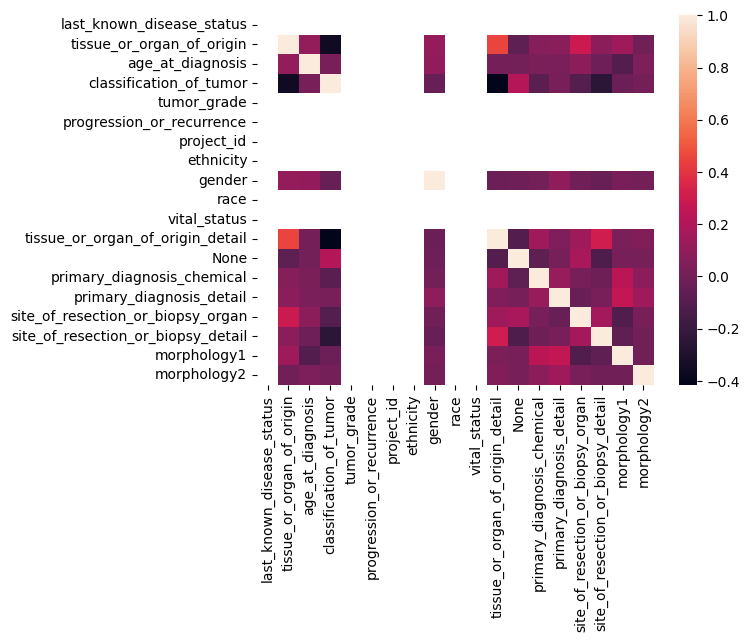

In [24]:
sns.heatmap(concaty.corr())
plt.show()

In [21]:
X_train.dtypes

,0
last_known_disease_status,int64
tissue_or_organ_of_origin,int64
age_at_diagnosis,int64
tumor_grade,int64
progression_or_recurrence,int64
project_id,int64
ethnicity,int64
gender,int64
race,int64
vital_status,int64


In [22]:
for i in [RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),BaggingClassifier(),ExtraTreesClassifier(),LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(),BernoulliNB(),GaussianNB(),MultinomialNB(),KNeighborsClassifier(),SVC(),XGBClassifier(),LGBMClassifier(),DecisionTreeClassifier(),MLPClassifier()]:
  random_classif=i
  random_classif.fit(X_train,Y_train)
  print(f"accuracy of model {i}",random_classif.score(X_test,Y_test))

accuracy of model RandomForestClassifier() 0.9930574840322133
accuracy of model GradientBoostingClassifier() 0.9797278533740628


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy of model AdaBoostClassifier() 0.6689808386559289
accuracy of model BaggingClassifier() 0.9966675923354624
accuracy of model ExtraTreesClassifier() 0.9875034712579839
accuracy of model LinearDiscriminantAnalysis() 0.6201055262427103
accuracy of model QuadraticDiscriminantAnalysis() 0.1291307970008331
accuracy of model BernoulliNB() 0.6376006664815329


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:975: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


accuracy of model GaussianNB() 0.5656762010552624
accuracy of model MultinomialNB() 0.5148569841710636
accuracy of model KNeighborsClassifier() 0.5201332963065814
accuracy of model SVC() 0.49014162732574285
accuracy of model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) 0.996945

In [29]:
rand_classif=RandomForestClassifier()
rand_classif.fit(X_train,Y_train)
print(rand_classif.score(X_test,Y_test))
predict=rand_classif.predict(X_test.iloc[:12,:])
print(predict)
print("the Y_test:",Y_test[:12].values.reshape(1,-1))

0.9922243821160789
[1 1 0 1 1 1 1 2 2 2 1 1]
the Y_test: [[1 1 0 1 1 1 1 2 2 2 1 1]]


DEEP LEARNING

In [37]:
from keras.layers import Layer,Dense,BatchNormalization,Flatten,Input,Dropout
from keras.models import Model,Sequential
from keras.initializers import HeNormal,GlorotUniform
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,SGD,RMSprop,Adamax,Adadelta

In [38]:
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=1
)

In [33]:
X_train.shape

(14403, 18)

In [34]:
Y_train.nunique()

3

In [ ]:
inputs=Input(shape=(18,))
d=Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
d=Dense(64,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dense(128,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01))(d)
d=Dense(256,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01))(d)
d=Dense(556,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01))(d)
d=Dense(1056,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01))(d)
d=Dense(2056,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01))(d)
outputs=Dense(3,activation="softmax")(d)
model=Model(inputs=inputs,outputs=outputs)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.4335 - loss: 212.6982 - val_accuracy: 0.3907 - val_loss: 10.8168
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.4838 - loss: 10.5533 - val_accuracy: 0.4999 - val_loss: 9.8251
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.4953 - loss: 9.6217 - val_accuracy: 0.4999 - val_loss: 9.0210
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.4981 - loss: 8.8564 - val_accuracy: 0.1341 - val_loss: 35.0120
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.4663 - loss: 9.6393 - val_accuracy: 0.4999 - val_loss: 7.7999
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.5014 - loss: 7.6054 - val_accuracy: 0.4999 - val_loss: 7.0307
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.5007 - loss: 6.8581 - val_accuracy: 0.4999 - val_loss: 6.3391
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.5040 - lo

m2
## New Sectionm2

In [39]:
inputs3=Input(shape=(18,))
d=Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs3)
d=Dense(64,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dropout(0.5)(d)
d=Dense(128,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dense(256,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dropout(0.5)(d)
d=Dense(556,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=BatchNormalization()(d)
d=Dense(1056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dense(2056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dropout(0.5)(d)
d=Dense(3056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dense(4056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
d=Dense(8056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
# d=Dense(2056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
# d=Dense(1056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
# d=Dense(2056,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(d)
outputs3=Dense(3,activation="softmax")(d)
model3=Model(inputs=inputs3,outputs=outputs3)
model3.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model3.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 682s 2s/step - accuracy: 0.4940 - loss: 134.5506 - val_accuracy: 0.4901 - val_loss: 5.2165
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.5109 - loss: 3.6974 - val_accuracy: 0.4901 - val_loss: 1.7152
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.5009 - loss: 1.5549 - val_accuracy: 0.4901 - val_loss: 1.2230
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.5095 - loss: 1.1774 - val_accuracy: 0.4901 - val_loss: 1.0773
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.5085 - loss: 1.0636 - val_accuracy: 0.4901 - val_loss: 1.0227
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.5054 - loss: 1.0189 - val_accuracy: 0.4901 - val_loss: 1.0023
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 689s 1s/step - accuracy: 0.5040 - loss: 1.0072 - val_accuracy: 0.4901 - val_loss: 0.9928
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 665s 1s/step - accuracy: 0.5032 - loss: 0.9980 - val_ac

Quantum Deep Learning

In [ ]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import cirq
import numpy as np

In [ ]:
def quantum_circuit(data):
  qubit=[cirq.GridQubit(0,i) for i in range(18)]
  circuit=cirq.Circuit()
  for i,value in enumerate(data):
    q=i%len(qubit)
    circuit.append(cirq.rx(value*np.pi).on(qubit[q]))
    circuit.append(cirq.H(qubit[q]))
    circuit.append(cirq.ry(value*np.pi).on(qubit[q]))
    if (i+1)%len(qubit)<len(qubit):
      circuit.append(cirq.CNOT(qubit[q],qubit[(i+1)%len(qubit)]))
      circuit.append(cirq.measure(qubit[q],key=f"qubit_{i}"))
  return circuit,qubit
def run_quantum_circuit(data):
  results=[]
  simulator=cirq.Simulator()
  for inputs_data in data:
    circuit,qubit=quantum_circuit(inputs_data)
    result=simulator.run(circuit)
    measure0=[]
    for i in range(len(inputs_data)):
      measure0.append(result.measurements[f"qubit_{i}"].flatten()[0])
    results.append(measure0)
  return np.array(results,dtype=np.float32)
class QuantumLayer(Layer):
  def __init__(self):
    super(QuantumLayer,self).__init__()
  def call(self,inputs):
    outputs=tf.numpy_function(run_quantum_circuit,[inputs],tf.float32)
    outputs.set_shape(inputs.shape)
    return outputs
model2=Sequential([
    QuantumLayer(),
    Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)),
    Dense(64,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)),
    Dense(128,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01)),
    Dense(256,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01)),
    Dense(556,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01)),
    Dense(1056,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01)),
    Dense(2056,activation="relu",kernel_initializer=GlorotUniform(),kernel_regularizer=l2(0.01)),
    Dense(3,activation="softmax")
])
 model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1137s 3s/step - accuracy: 0.5008 - loss: 6.5176 - val_accuracy: 0.5029 - val_loss: 1.1171
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1110s 2s/step - accuracy: 0.5006 - loss: 1.0633 - val_accuracy: 0.5029 - val_loss: 0.9979
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1148s 3s/step - accuracy: 0.5054 - loss: 0.9916 - val_accuracy: 0.5029 - val_loss: 0.9872
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.5037 - loss: 0.9895 - val_accuracy: 0.5029 - val_loss: 0.9862
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1121s 2s/step - accuracy: 0.4992 - loss: 0.9863 - val_accuracy: 0.5029 - val_loss: 0.9869
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1105s 2s/step - accuracy: 0.5017 - loss: 0.9858 - val_accuracy: 0.5029 - val_loss: 0.9871
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1086s 2s/step - accuracy: 0.4983 - loss: 0.9898 - val_accuracy: 0.5029 - val_loss: 0.9907
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 1071s 2s/step - accuracy: 0.5030 - loss: 0

In [ ]:
model2.predict(X_test.iloc[:18,:])

In [ ]:
Y_test[:18]

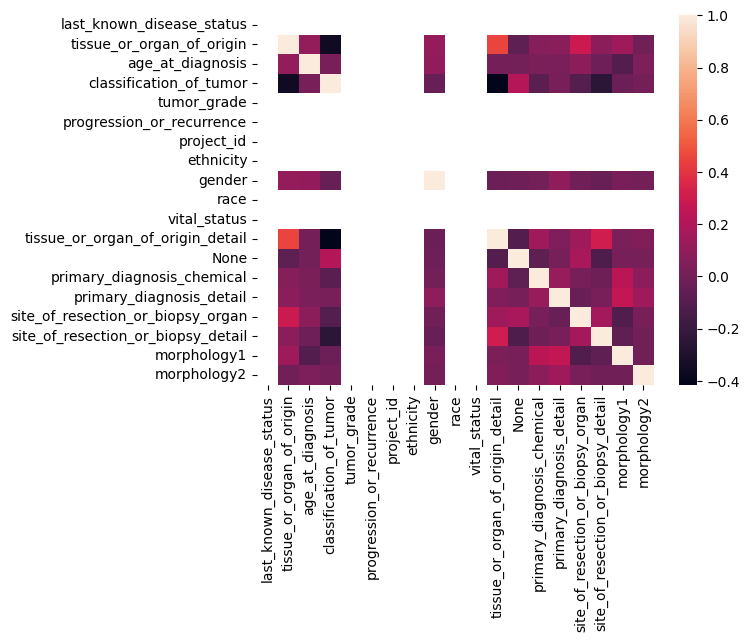